<a href="https://colab.research.google.com/github/Chockalingam-M/Deep-Learning-for-Computer_Vision/blob/main/Dress_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

keras.utils.set_random_seed(42)

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

In [ ]:
labels[y_train[4]]

'T-shirt/top'

In [ ]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   9,   6,
          0,   0,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 209, 231, 248,
        252, 250, 253, 246, 206, 132,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 227, 243, 234, 234,
        248, 246, 238, 230, 234, 250, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  57, 231, 213, 227, 234,
        232, 231, 235, 232, 218, 218, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 239, 207, 213, 236,
        235, 232, 232, 229, 210, 215, 207,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 211, 245, 229, 197, 220,
        221, 221, 222, 203, 221, 235, 222,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  55, 154, 239, 213, 217,
        218, 214, 215, 215, 199, 235, 167,  61,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 238, 220,
        221, 215, 210, 249,  98,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0, 225, 220,
        214, 211, 215, 251, 112,   0,   2,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 208, 218,
        218, 224, 210, 221, 100,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  16, 213, 244,
        255, 218, 204, 218, 143,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  76, 232, 235,
        234, 218, 211, 220, 223,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 225, 218,
        218, 220, 206, 209, 213,  32,   0,   5,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 214, 218, 222,
        221, 218, 210, 207, 217,  89,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207, 211, 225,
        218, 218, 209, 208, 217, 165,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 221, 206, 225,
        218, 218, 210, 207, 215, 203,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 204, 224,
        222, 216, 211, 210, 210, 196,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 232, 203, 225,
        222, 216, 211, 214, 208, 204,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 137, 235, 203, 225,
        222, 217, 210, 214, 209, 211,  15,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 234, 202, 223,
        223, 220, 210, 214, 209, 215,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 185, 235, 203, 224,
        224, 220, 210, 216, 213, 221,  66,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 197, 237, 193, 225,
        224, 218, 209, 217, 213, 223,  88,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 224, 242, 189, 224,
        227, 223, 209, 217, 214, 227,  91,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 241, 242, 193, 232,
        234, 222, 211, 222, 217, 229, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

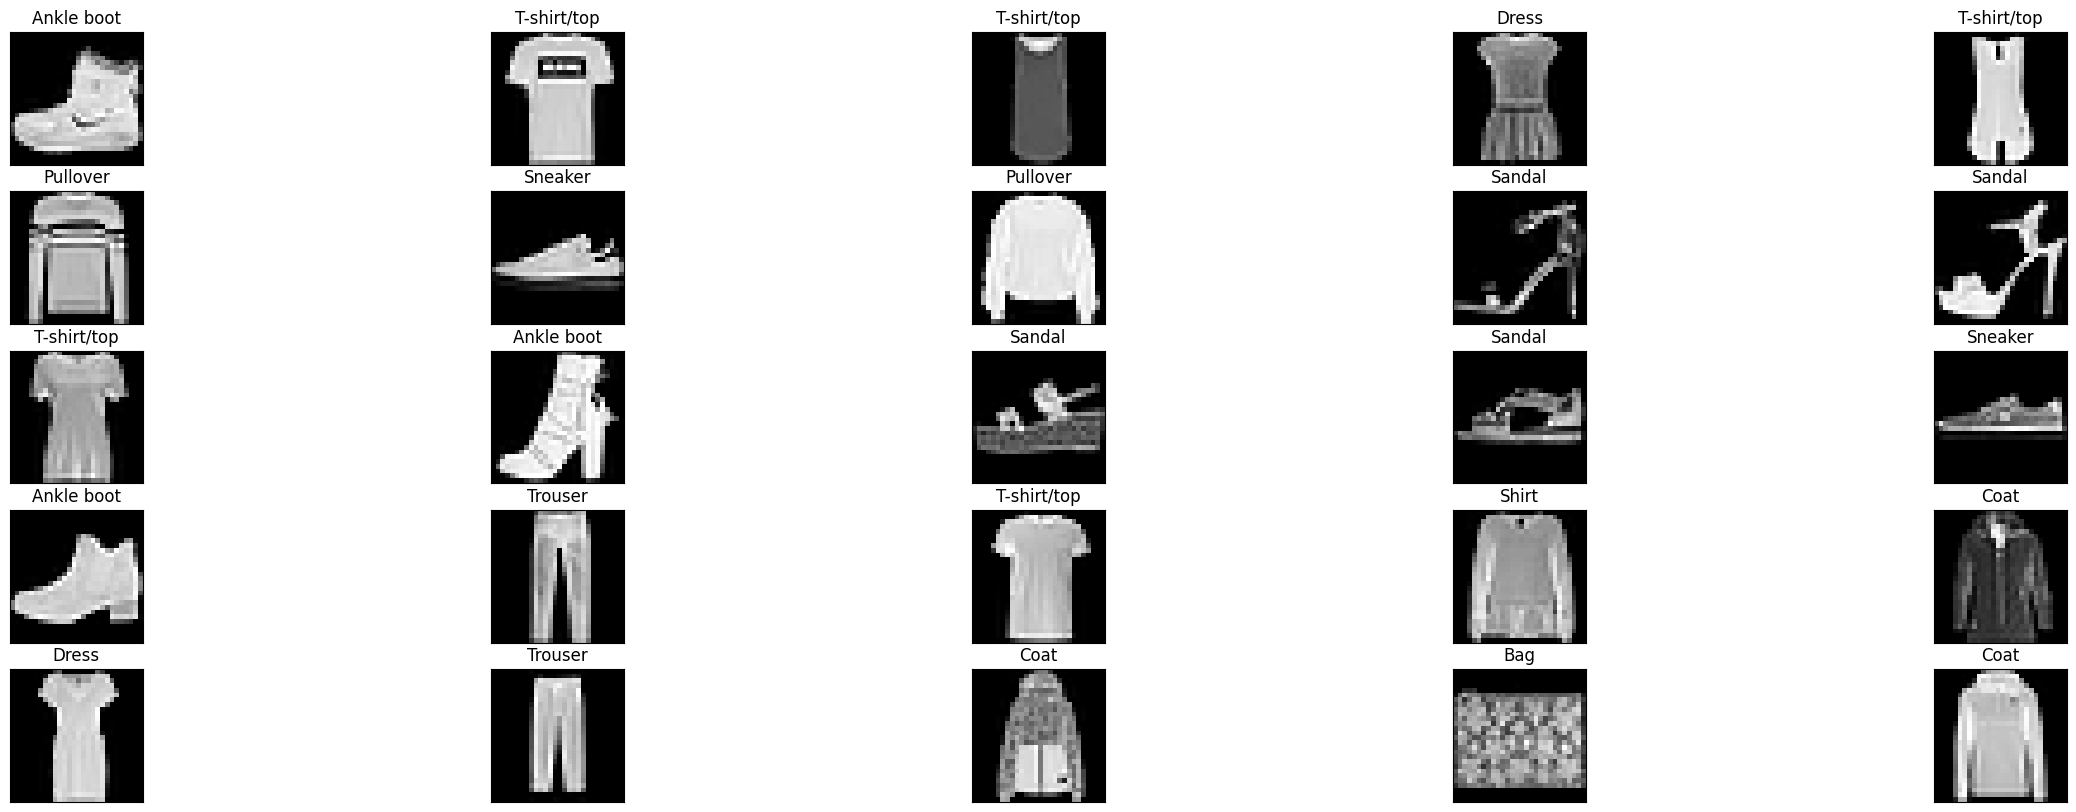

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(30, 10))
for i in range(25):
  axc = ax[i//5, i%5]
  axc.imshow(x_train[i], cmap="gray")
  axc.set_title(f"{labels[y_train[i]]}")
  axc.set_xticks([])
  axc.set_yticks([])

In [ ]:
x_train = x_train / 255

In [ ]:
input = keras.Input(shape=(28,28))
h = keras.layers.Flatten()(input)
h = keras.layers.Dense(256, activation="relu", name="Hidden")(h)
output = keras.layers.Dense (10, activation="softmax", name="Output")(h)
model = keras.Model(input,output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile (loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit (x_train , y_train,
                     batch_size = 64, epochs = 15, validation_split = 0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7676 - loss: 0.6641 - val_accuracy: 0.8564 - val_loss: 0.4109
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8589 - loss: 0.3975 - val_accuracy: 0.8655 - val_loss: 0.3771
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8753 - loss: 0.3490 - val_accuracy: 0.8733 - val_loss: 0.3573
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8855 - loss: 0.3179 - val_accuracy: 0.8757 - val_loss: 0.3505
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8918 - loss: 0.2951 - val_accuracy: 0.8774 - val_loss: 0.3494
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8986 - loss: 0.2773 - val_accuracy: 0.8772 - val_loss: 0.3514
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9056 - loss: 0.2627 - val_accuracy: 0.8826 - val_loss: 0.3364
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9101 - loss: 0.2492 - val_accuracy: 0.

In [ ]:
def plot_loss_curve(history):
  plt.clf()
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_acc_curve(history):
  plt.clf()
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(1, len(acc) +1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()


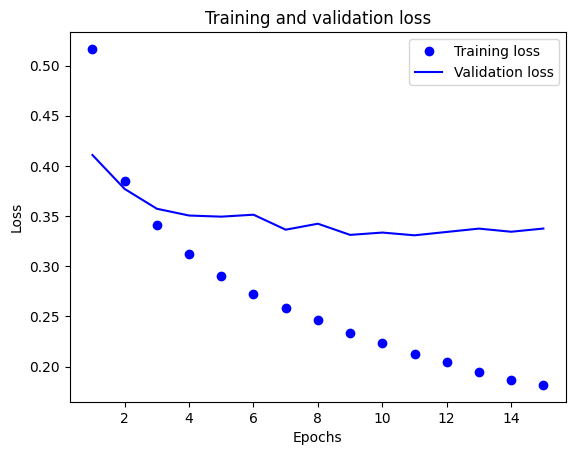

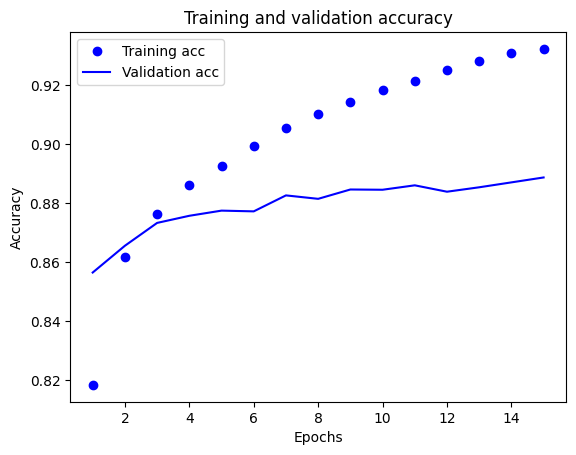

In [ ]:
plot_loss_curve(history)
plot_acc_curve(history)

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8646 - loss: 76.5964


[79.94535064697266, 0.8634999990463257]

In [ ]:
input= keras.Input(shape=(28,28))
h = keras.layers.Flatten()(input)
h= keras.layers.Dense(256,activation="relu", name="hidden1")(h)
h= keras.layers.Dense(128,activation="relu", name="hidden2")(h)
output = keras.layers.Dense(10, activation="softmax", name="output")(h)
model = keras.Model(input,output)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train, batch_size=64, epochs=20, validation_split=0.2)
model.evaluate(x_test,y_test)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9371 - loss: 0.1660 - val_accuracy: 0.8882 - val_loss: 0.3681
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9415 - loss: 0.1565 - val_accuracy: 0.8895 - val_loss: 0.3572
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9438 - loss: 0.1503 - val_accuracy: 0.8878 - val_loss: 0.3594
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9463 - loss: 0.1425 - val_accuracy: 0.8899 - val_loss: 0.3629
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9473 - loss: 0.1391 - val_accuracy: 0.8865 - val_loss: 0.3954
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9465 - loss: 0.1398 - val_accuracy: 0.8861 - val_loss: 0.4187
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9511 - loss: 0.1279 - val_accuracy: 0.8857 - val_loss: 0.4341
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9509 - loss: 0.1278 - val_accuracy: 0.

[127.22311401367188, 0.8654999732971191]

In [ ]:
def plot_loss_curve1(history):
  plt.clf()
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_acc_curve1(history):
  plt.clf()
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(1, len(acc) +1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()


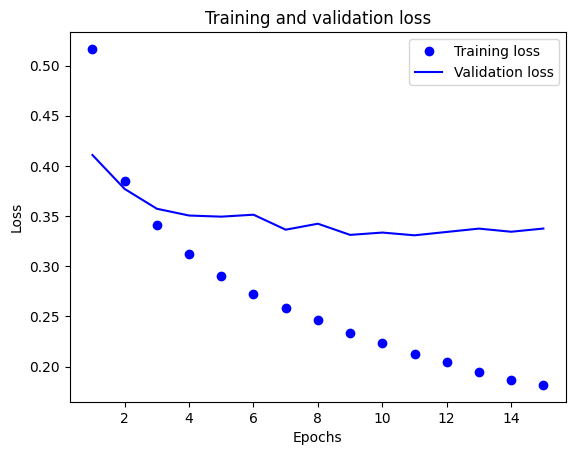

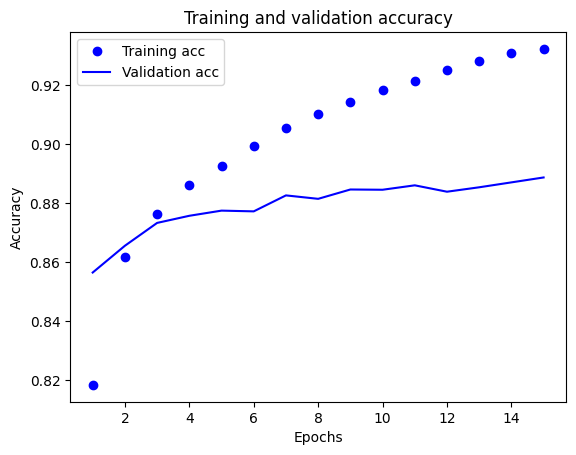

In [ ]:
plot_loss_curve1(history)
plot_acc_curve1(history)